In [1]:
#ATTENTION! CYLINDER_ALL.mat is not added to DATA/FLUIDS folder due the github upload file size restrictions. 
#DONT run this notebook without putting data in the corresponding folders

# Exercise 1.7

**Anton Myshak**

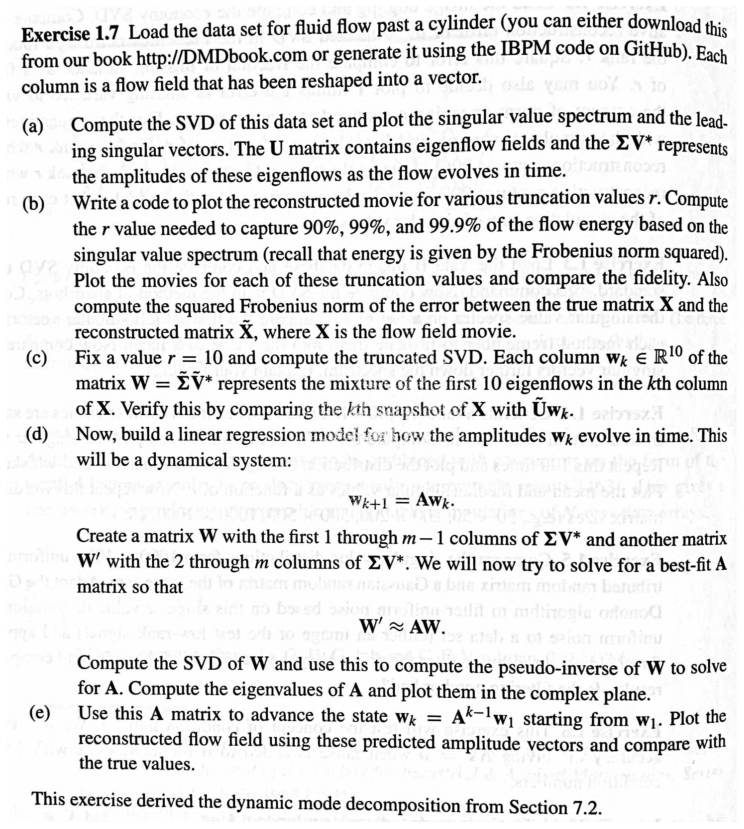

In [2]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

from sklearn.decomposition import PCA

plt.figure(figsize=(15,15))
plt.imshow(imread('./ex1.7.png'))
plt.axis('off');

In [3]:
mat_contents = scipy.io.loadmat('../DATA/FLUIDS/CYLINDER_ALL.mat')
UALL = mat_contents['UALL']
VALL = mat_contents['VALL']
VORTALL = mat_contents['VORTALL']

M, N = *mat_contents['m'], *mat_contents['n']

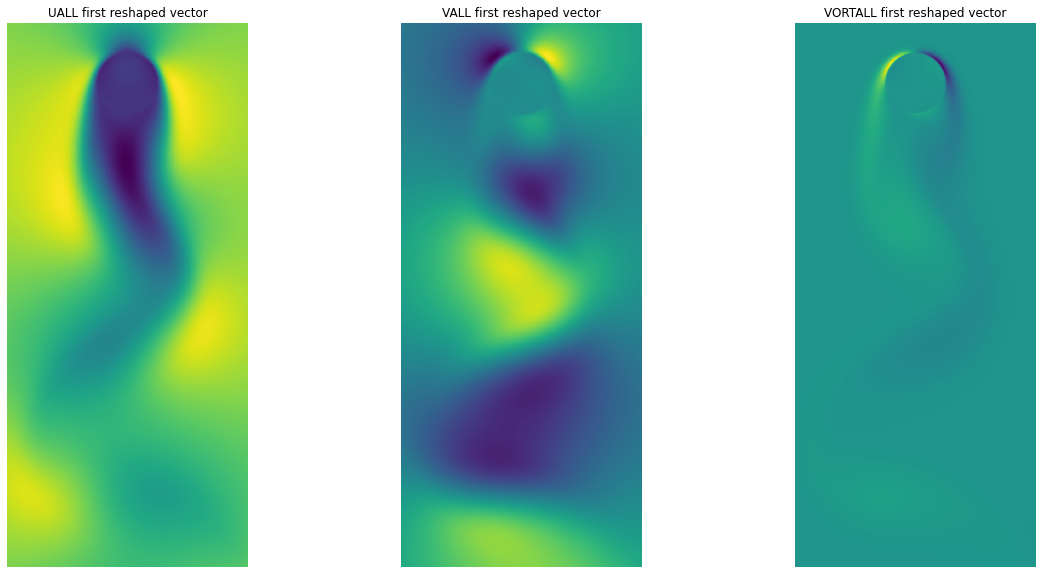

In [4]:
f, axes = plt.subplots(1,3, figsize=(20,10))

axes[0].imshow(UALL[:,0].reshape(*N,*M))
axes[0].set_title('UALL first reshaped vector')
axes[0].axis('off')
axes[1].imshow(VALL[:,0].reshape(*N,*M))
axes[1].set_title('VALL first reshaped vector')
axes[1].axis('off')
axes[2].imshow(VORTALL[:,0].reshape(*N,*M))
axes[2].set_title('VORTALL first reshaped vector')
axes[2].axis('off');

# Statement (a)

In [5]:
#I am using economy SVD b/ otherwise I will lost a lot of time and possibly kill my kernel
U_ec, S_ec, VT_ec = np.linalg.svd(VORTALL, full_matrices=False)
print('U_ec shape', U_ec.shape, '\nS_ec shape', S_ec.shape, '\nVT_ec shape', VT_ec.shape)

U_ec shape (89351, 151) 
S_ec shape (151,) 
VT_ec shape (151, 151)


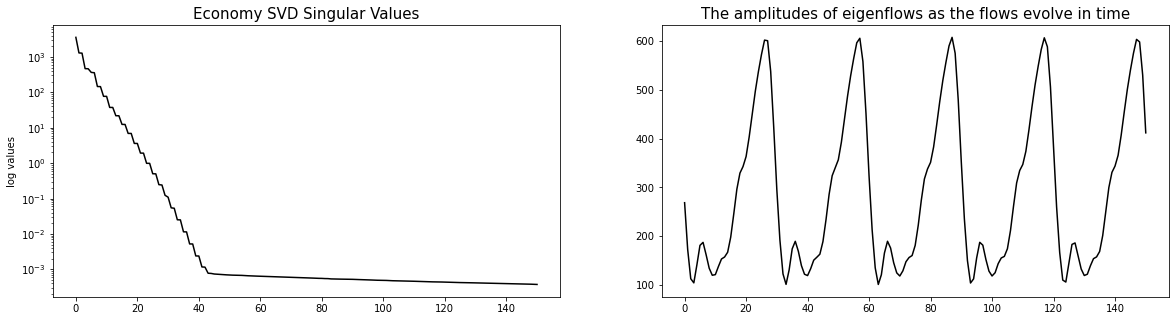

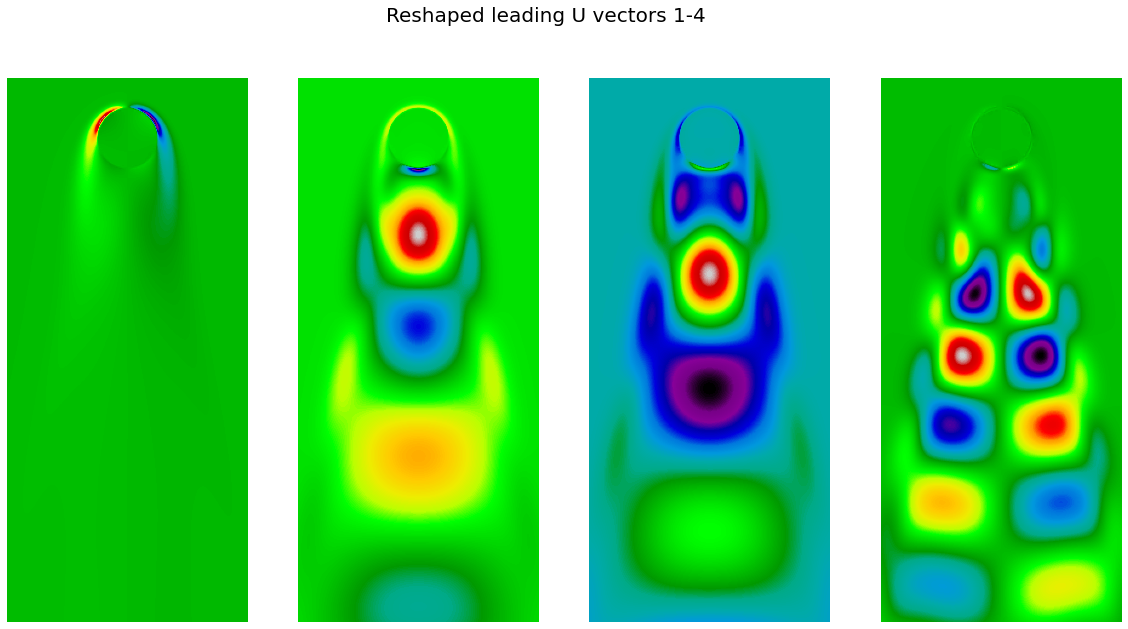

In [6]:
f, axes = plt.subplots(1, 2, figsize=(20,5))
axes[0].semilogy(S_ec, color='black', label='Full SVD Singular Values') #spectrum
axes[0].set_title('Economy SVD Singular Values', size=15)
axes[0].set_ylabel('log values')
axes[1].plot(S_ec @ VT_ec, color='black')
axes[1].set_title('The amplitudes of eigenflows as the flows evolve in time', size=15)

f, axes = plt.subplots(1, 4, figsize=(20,10))
plt.suptitle('Reshaped leading U vectors 1-4', size=20)
axes[0].imshow(U_ec[:,0].reshape(*N,*M), cmap='nipy_spectral')
axes[0].axis('off')
axes[1].imshow(U_ec[:,1].reshape(*N,*M), cmap='nipy_spectral')
axes[1].axis('off')
axes[2].imshow(U_ec[:,2].reshape(*N,*M), cmap='nipy_spectral')
axes[2].axis('off')
axes[3].imshow(U_ec[:,3].reshape(*N,*M), cmap='nipy_spectral')
axes[3].axis('off');

# Statement (b)

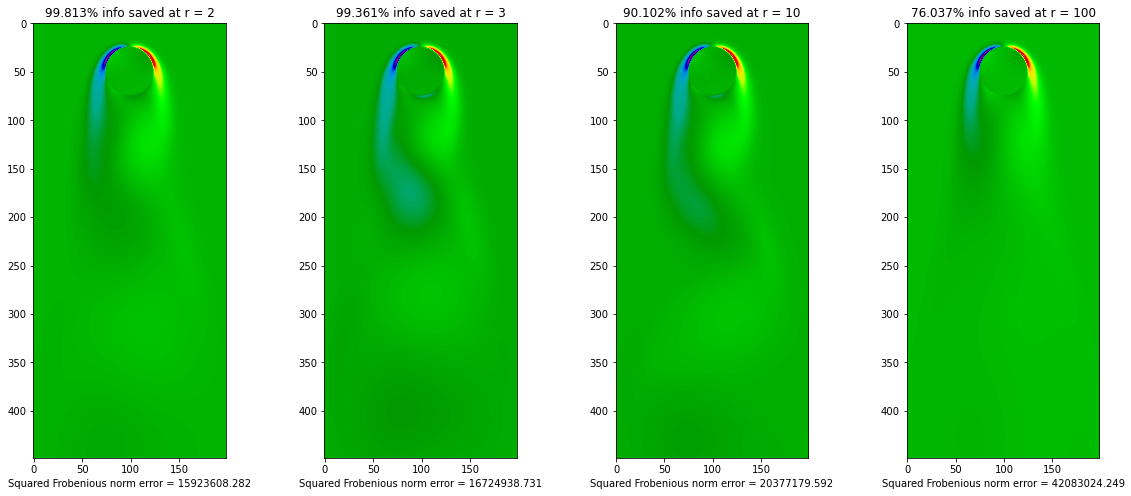

In [7]:
f, axes = plt.subplots(1,4, figsize=(20,8))

pca = PCA(n_components=1)
X = pca.fit_transform(VORTALL)

for i,r in enumerate([2, 3, 10, 100]): #Truncation value
    X_approx = U_ec[:,:r] @ np.diag(S_ec)[:r,:r] @ VT_ec[:r,:r]
    # pca = PCA(n_components=1)
    X_approx = pca.fit_transform(X_approx)
    squared_frob_err = np.linalg.norm(X - X_approx)**2

    axes[i].imshow(X_approx.reshape(*N,*M), cmap='nipy_spectral')
    axes[i].set_title('{}% info saved at r = {}'.format(round(pca.explained_variance_ratio_[0]*100, 3), r) )
    axes[i].set_xlabel('Squared Frobenious norm error = {}'.format(round(squared_frob_err, 3)))

# Statement (c)

In [8]:
r = 10
W = np.diag(S_ec)[:r,:r] @ VT_ec[:r,:r]

In [9]:
V_S2_VT = VORTALL.T @ VORTALL
S2_MoS, V_MoS = np.linalg.eig(V_S2_VT)
S_MoS = np.sqrt(S2_MoS)
U_MoS = VORTALL @ V_MoS @ np.linalg.inv(np.diag(S_MoS))

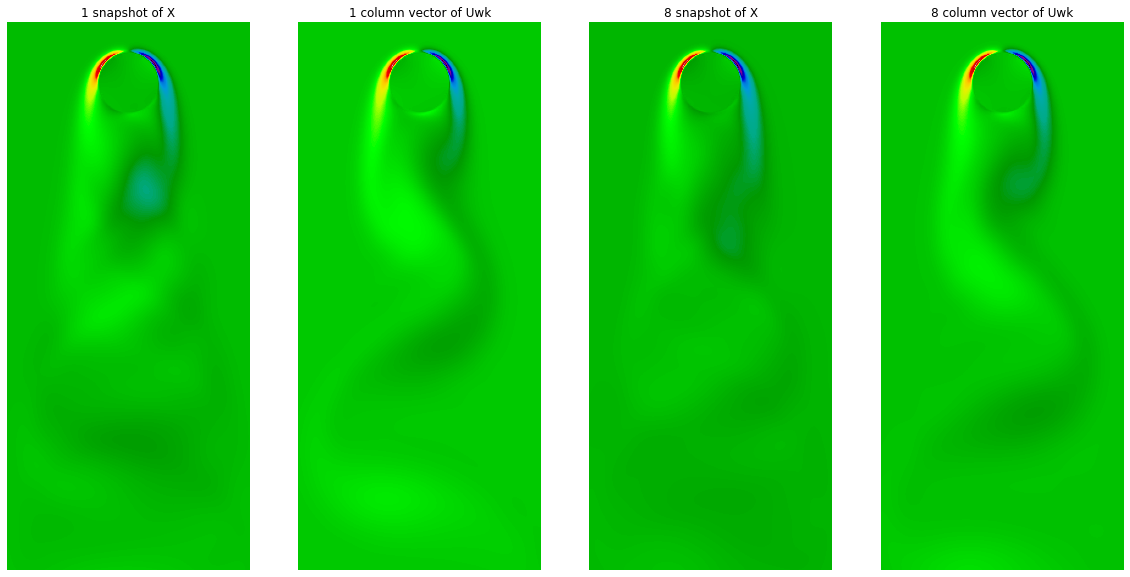

In [10]:
f, ax = plt.subplots(1, 4, figsize=(20,40))

for i in range(2):
    
    ax[i*2].imshow((U_MoS @ np.diag(S_MoS) @ V_MoS)[:,i*7].reshape(*N,*M), cmap='nipy_spectral')
    ax[i*2].set_title('{} snapshot of X'.format(i*7+1))
    ax[i*2].axis('off')
    ax[i*2+1].imshow((U_ec[:,:r]@W[:,i*7]).reshape(*N,*M), cmap='nipy_spectral')
    ax[i*2+1].set_title('{} column vector of Uwk'.format(i*7+1))
    ax[i*2+1].axis('off');

# Statement (d)

In [11]:
W1 = (np.diag(S_ec) @ VT_ec)[:,:-1]
W2 = (np.diag(S_ec) @ VT_ec)[:,1:]
U_w1, S_w1, VT_w1 = np.linalg.svd(W1, full_matrices=False)

In [12]:
W1t = VT_w1.T @ np.linalg.inv(np.diag(S_w1)) @ U_w1.T
A = W2 @ W1t

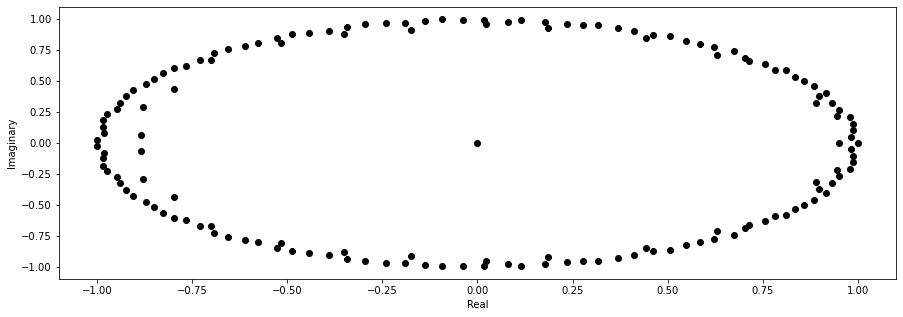

In [13]:
S2_A, V_A = np.linalg.eig(A)

S2_A_real = [ele.real for ele in S2_A]
S2_A_img = [ele.imag for ele in S2_A]
  
plt.figure(figsize=(15,5))
plt.scatter(S2_A_real, S2_A_img, color='black')
plt.ylabel('Imaginary')
plt.xlabel('Real');

# Statement (e)

In [14]:
wk = np.array([A**k @ W1[:,0] for k in range(W1.shape[1]+1)])

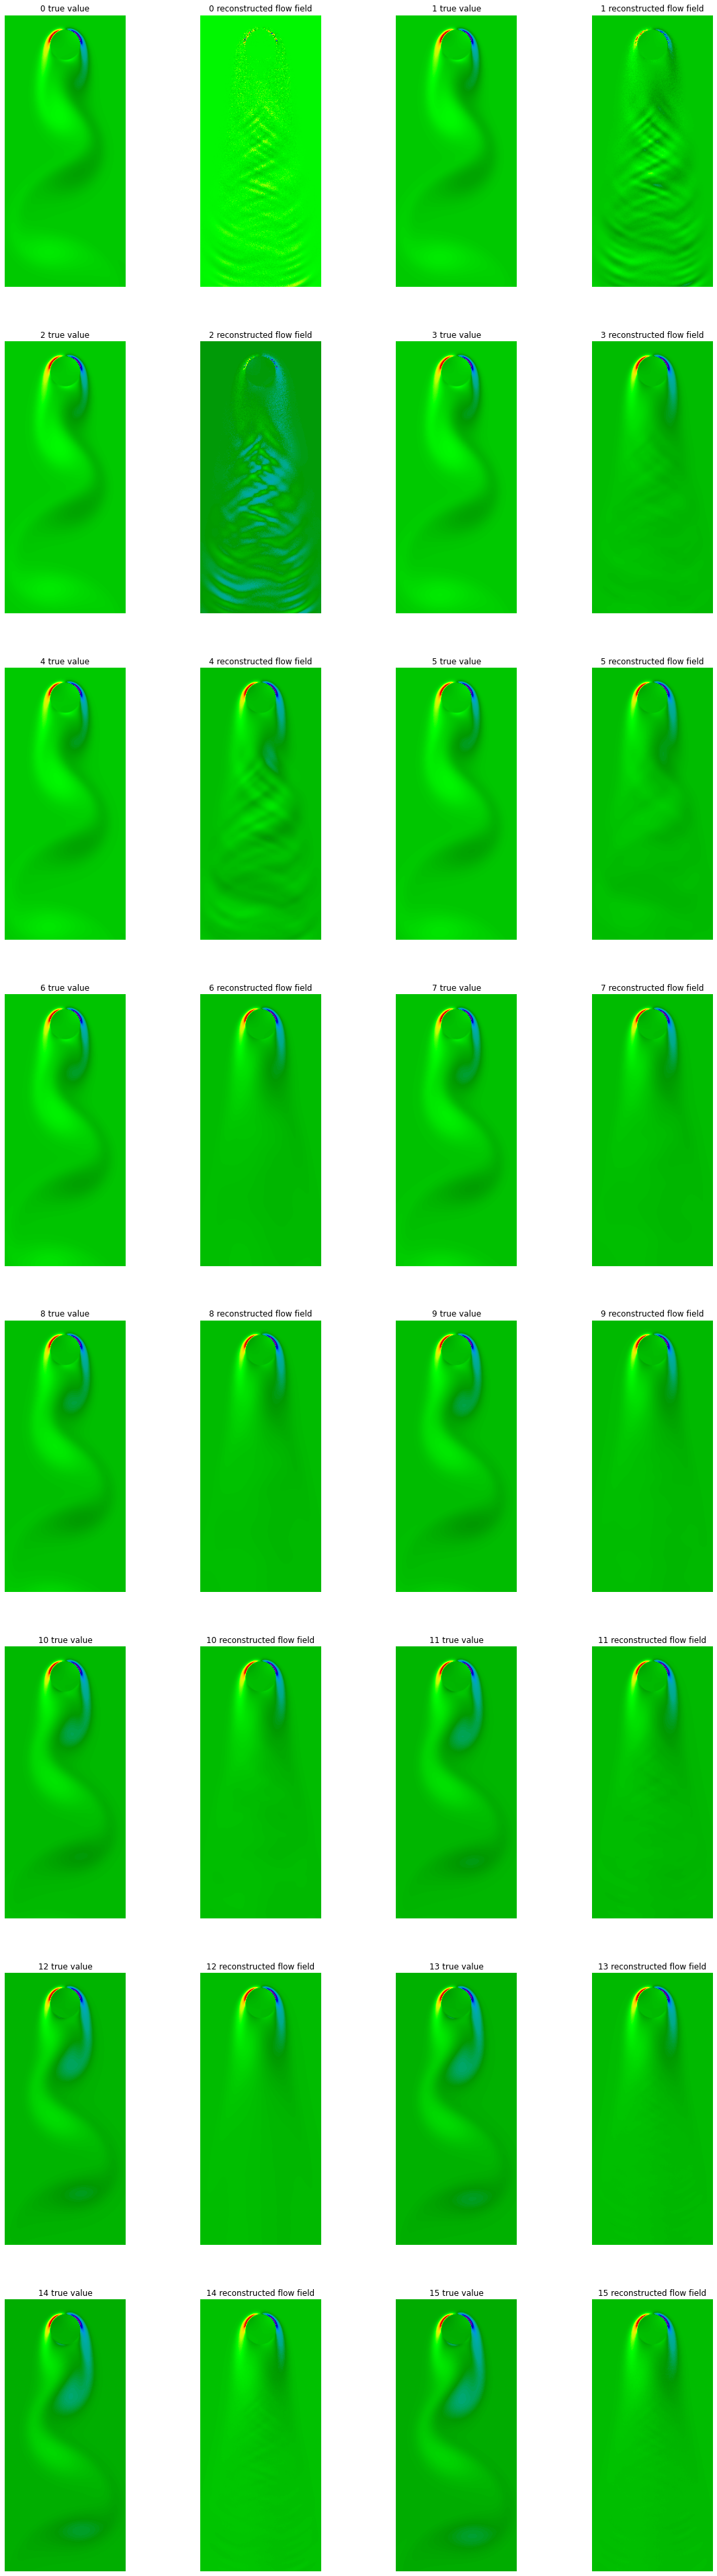

In [16]:
f, axes = plt.subplots(8,4, figsize=(20,70))

for i in range(8):
    axes[i][0].imshow((U_ec @ W1[:,i*2]).reshape(*N,*M), cmap='nipy_spectral')
    axes[i][0].set_title('{} true value'.format(i*2))
    axes[i][0].axis('off')
    
    axes[i][1].imshow((U_ec @ wk[:,i*2]).reshape(*N,*M), cmap='nipy_spectral')
    axes[i][1].set_title('{} reconstructed flow field'.format(i*2))
    axes[i][1].axis('off');
    
    axes[i][2].imshow((U_ec @ W1[:,i*2+1]).reshape(*N,*M), cmap='nipy_spectral')
    axes[i][2].set_title('{} true value'.format(i*2+1))
    axes[i][2].axis('off')
    
    axes[i][3].imshow((U_ec @ wk[:,i*2+1]).reshape(*N,*M), cmap='nipy_spectral')
    axes[i][3].set_title('{} reconstructed flow field'.format(i*2+1))
    axes[i][3].axis('off');